# Probability Assignment

To get full credit in this assignment you need to use only `numpy` or `jax` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

PS: Please note that we run through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions. .

## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i=1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p=1/2$.

Your job is to sample $n=50$ posts and estimate the approval rate of the CEO by considering the statistics of $y=x_1+x_2+ \dots + x_n$. What is the probability that 25 employees approve the CEO?

## Question 1b (10 points)

Following your findings in Q1a, read about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that 

$$z=\frac{y-\mu_y}{\sigma_y}$$ 

is normally distributed with mean 0 and variance 1.

Can you find the  probability that 25 employees approve the CEO using the Gaussian approximation?


Type the answer here using the [latex syntax](https://wch.github.io/latexsheet/) or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax `![title](image_name.png)`

![Q1](q1.png)

## Question 2 (20 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1. 

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.** 

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ? 

Type the answer here using the [latex syntax](https://wch.github.io/latexsheet/) or handwrite the answer, upload the picture in the same folder and use a new markdown cell with markdown syntax `![title](image_name.png)`


![Question2](q2.png)

## Question 3 (20 points) 

Referring to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 


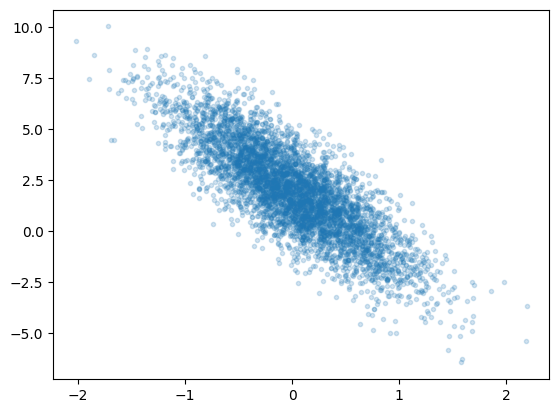

In [181]:
import numpy as np
from matplotlib import pyplot as plt

# Referred textbook example 6.6 for inputs
mean = [0, 2]
covariance = np.matrix([
[0.3, -1],
[-1, 5]
])

# Generate random samples and plot multivariate normal distribution
x, y = np.random.default_rng().multivariate_normal(mean, covariance, 5000).T
plt.plot(x, y, '.', alpha=0.2)
plt.show()

## Question 4 (20 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the `Math for ML` textbook in your course site  is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch. 

1. Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.  
2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.


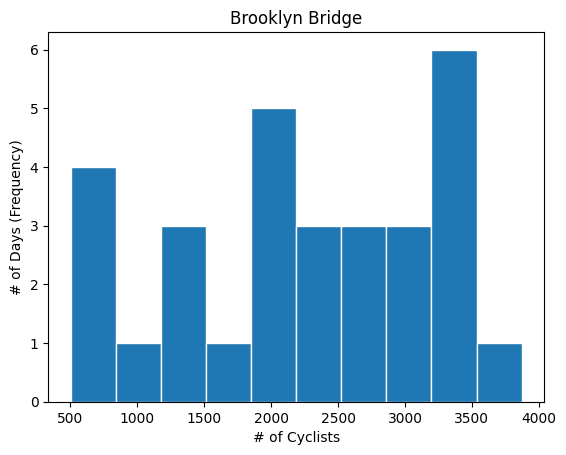

In [561]:
# Q4 - 1 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read data
data = pd.read_csv("nyc-east-river-bicycle-counts.csv")

# Clean the data (there are 7 copies of same data)
clean_df = data[['Brooklyn Bridge']].dropna().drop_duplicates()

# Show histogram
plt.title('Brooklyn Bridge')
plt.ylabel('# of Days (Frequency)')
plt.xlabel('# of Cyclists')
plt.hist(clean_df, edgecolor='white')
plt.show()

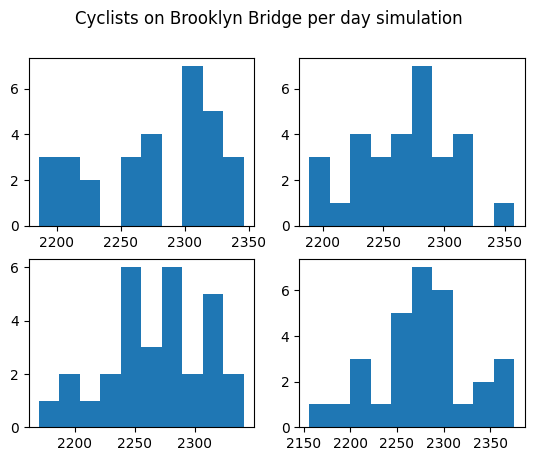

In [564]:
#Q4 - 2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read data
data = pd.read_csv("nyc-east-river-bicycle-counts.csv")

# Clean the data (there are 7 copies of same data)
clean_df = data[['Brooklyn Bridge']].dropna().drop_duplicates()

# Prepare 2x2 subplots
fig, ax = plt.subplots(2, 2)
fig.suptitle('Cyclists on Brooklyn Bridge per day simulation')

# Create 4(2x2) different lambda sample datasets 
for i in range(0,2):
    for j in range (0,2):
        ax[i, j].hist(np.random.poisson(lam=clean_df.mean(), size=clean_df.size))


# Question 5 (20 points)

You are asked to stress test an cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through [this introductory](https://queue-it.com/blog/queuing-theory/) page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue [here](https://en.wikipedia.org/wiki/M/M/1_queue). Make sure you click on the links and learn about the random process called Poisson process. 


Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests $\lambda=[1, 3, 4]$ and the service time of the requests as an exponential random variable with rate $\mu=4$. 

   

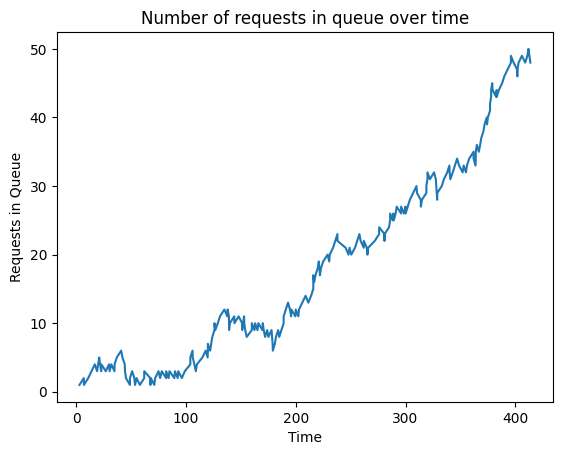

In [176]:
#Q5
import numpy as np
import queue
from matplotlib import pyplot as plt

# Arrival Times lam = lam[1,3,4]  
lamb = np.mean([1,3,4])
# Service Rate (mu) =  4
mu = 4
# Test 100 requests
req_count = 100

time = []
queue_size = []
q = queue.Queue()

# Set first arrival time
nextArrival = np.random.poisson(lam=lamb)
# Set first completion time (next service available)
nextService = nextArrival + np.random.exponential(mu)

while (req_count > 0):
    # While next requests arrives before next available time
        # debug--- print('Service avail at ', nextService)
    while (nextArrival < nextService):
        # Put current arrival in queue
        q.put(nextArrival)
        # Store time and queue size in arrays
        time.append(nextArrival)
        queue_size.append(q.qsize())
            # debug--- print('New req arrived at ', nextArrival) 
            # debug--- print('Item in queue', q.qsize())
        # Sample an upcoming arrival 
        newArrival = np.random.poisson(lam=lamb)
        # Update next arrival
        nextArrival += newArrival
            # debug--- print('Next req arrive at ', nextArrival)
    # When time elasped to move to next service
    if (q.not_empty):
        # Dequeue the first service
        dequeue = q.get()
        # Find completion time
        completed_at = nextArrival - (nextArrival - nextService)
            # debug--- print('Dequeued at ',completed_at, 'q=', q.qsize())
        # Store time and queue size in arrays
        time.append(completed_at)
        queue_size.append(q.qsize())
        # Sample next service
        newService = np.random.exponential(mu)
        # Update next available time
        nextService += newService
            # debug--- print('Next Service in ', nextService - completed_at)
        req_count -= 1

plt.title('Number of requests in queue over time')
plt.ylabel('Requests in Queue')
plt.xlabel('Time')
plt.plot(time,queue_size)
